In [16]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.linear_model import Lasso,LassoLarsCV, LassoLars, ElasticNetCV, ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib notebook 

In [17]:
data = pd.read_csv("PGT121_Neu_OccAA.csv", header =0)

In [18]:
import pickle as pkl

with open("lasso.pkl", "rb") as f:
    lasso_inds, labels = pkl.load(f)

In [19]:
with open("enet.pkl", "rb") as f:
    enet_inds = pkl.load(f)

In [20]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log10)

In [43]:
Y = data.values[:, 1]
Y = transformer.transform(Y)
Y= Y.T
features = data.values[:, 5:]
labels = data.columns.values[5:]


filter_mask = np.where(np.all(features == features[0,:], axis = 0))
X = np.delete(features, filter_mask, axis = 1)
labels = np.delete(labels, filter_mask)
X= X[:, enet_inds]
names = data.values[:, 3]
# X = X.astype("float")
# Y = Y.astype("float")
print(X.shape)
print(Y.shape)

C:\Users\Sky\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(506, 83)
(506, 1)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)


In [45]:
print(len(enet_inds))

83


In [46]:
print(labels[enet_inds])

['Pos4_R' 'Pos6_I' 'Pos19_I' 'Pos23_W' 'Pos59_K' 'Pos84_M' 'Pos102_E'
 'Pos106_E' 'Pos134_A' 'Pos135_T' 'Pos147_-' 'Pos147_D' 'Pos151_K'
 'Pos172_E' 'Pos173_Y' 'Pos173_Q' 'Pos181_I' 'Pos183_P' 'Pos198_T'
 'Pos291_S' 'Pos293_E' 'Pos300_N' 'Pos306_R' 'Pos315_Q' 'Pos319_A'
 'Pos325_D' 'Pos337_E' 'Pos340_N' 'Pos340_R' 'Pos347_E' 'Pos363_P'
 'Pos379_G' 'Pos388_T' 'Pos389_G' 'Pos389_Q' 'Pos393_S' 'Pos398_S'
 'Pos411_E' 'Pos416_I' 'Pos429_G' 'Pos434_M' 'Pos492_K' 'Pos500_K'
 'Pos507_E' 'Pos514_V' 'Pos518_V' 'Pos580_I' 'Pos607_N' 'Pos633_K'
 'Pos636_S' 'Pos640_N' 'Pos640_D' 'Pos644_N' 'Pos648_E' 'Pos659_D'
 'Pos665_K' 'Pos674_D' 'Pos677_K' 'Pos732_G' 'Pos777_I' 'Pos783_E'
 'Pos812_I' 'Pos832_L' 'Pos833_I' 'Pos836_L' 'Pos843_I' 'Pos845_R' 'N137'
 'N139' 'N147' 'N185' 'N186_1' 'N234' 'N276' 'N289' 'N293' 'N301' 'N332'
 'N354_1' 'N392' 'N397' 'N410' 'N465']


In [47]:
model = SVR(kernel = "rbf", C= 10.0,gamma = 0.00025,coef0=0 ,verbose = 10).fit(X_train, y_train)
# model = SVR(kernel = "poly").fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
# print(mean_squared_error(y_test, pred))

[LibSVM]0.354333511924


C:\Users\Sky\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print(model)

SVR(C=10.0, cache_size=200, coef0=0, degree=3, epsilon=0.1, gamma=0.00025,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=10)


<IPython.core.display.Javascript object>


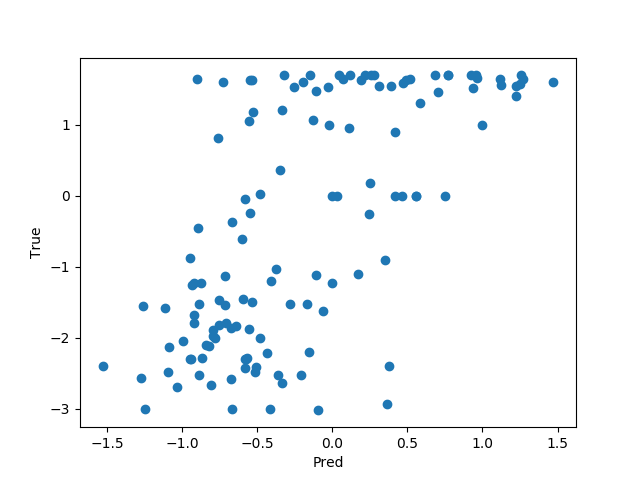

In [49]:
fig, ax = plt.subplots()
ax.scatter(pred, y_test)
ax.set_xlabel("Pred")
ax.set_ylabel("True")